Load the necessary libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data  from ''jester-data-1.csv''

In [101]:
df_jester = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', header=None)

df_jester

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


Check the dataset description to figure out which value you should replace with NaNs (the cells for which we don't have a rating). This is the test set.

In [102]:
df_jester = df_jester.replace(99.00, np.nan)
# to drop column
df_jester = df_jester.iloc[: , 1:]

Use pandas to find the best- and the worst-rated jokes

In [103]:
df_jester.describe()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
count,16452.000000,18184.000000,16642.000000,15608.000000,24977.000000,20431.000000,24976.000000,24981.000000,15752.000000,20324.000000,...,9672.000000,9889.000000,9988.000000,10200.000000,10265.000000,10370.000000,10520.000000,10666.000000,10910.000000,9943.000000
mean,0.904573,0.208460,0.316574,-1.449114,0.403556,1.594447,-0.429662,-0.624085,-0.557031,1.301231,...,2.038527,1.179744,2.504041,1.173482,1.039130,1.528003,1.673750,0.767692,-0.031244,1.354711
std,5.171798,5.597327,5.399806,5.234654,5.255700,4.900540,5.495931,4.929144,5.162224,5.087359,...,5.060445,5.127291,4.611339,5.140307,5.167043,4.852069,5.025076,5.393833,5.176806,5.300409
min,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,-2.670000,-4.420000,-4.030000,-5.870000,-3.690000,-1.310000,-5.290000,-4.610000,-4.760000,-2.090000,...,-0.932500,-2.380000,-0.100000,-2.280000,-2.570000,-1.347500,-1.170000,-3.400000,-4.170000,-2.330000
50%,1.600000,0.830000,0.780000,-1.460000,1.120000,2.230000,-0.050000,-0.290000,-0.190000,1.940000,...,2.860000,1.800000,3.160000,1.750000,1.650000,2.140000,2.480000,1.460000,0.290000,2.140000
75%,4.900000,4.820000,4.660000,2.520000,4.470000,5.440000,3.880000,3.060000,3.300000,5.390000,...,6.120000,5.290000,6.070000,5.290000,5.100000,5.277500,5.630000,5.150000,3.980000,5.730000
max,9.370000,9.370000,9.370000,9.370000,9.370000,9.470000,9.610000,9.760000,9.900000,9.370000,...,9.560000,9.420000,9.370000,9.420000,9.370000,9.370000,9.370000,9.370000,9.370000,9.370000


In [104]:
df_jester.mean().sort_values(ascending=True)

58   -3.833880
16   -3.104818
44   -2.111891
57   -1.990664
13   -1.762882
        ...   
32    3.155988
27    3.189821
36    3.312500
89    3.574720
50    3.665085
Length: 100, dtype: float64

Modify and use the helper function provided in the helper_function notebook (or create your own) to label 10% of the dataset cells that are not NaNs as 99. 
 
This is your validation set. Keep the the actual values of the cells so you can use them later (as done in the example of the helper_function notebook).

In [105]:
arr = df_jester.values
print(arr.shape)

(24983, 100)


In [106]:
rated = np.where(arr!=np.nan)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [107]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=np.nan)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [108]:
new_arr, idx = replace(arr, 0.1)

In [109]:
arr[idx[0][0], idx[1][0]]

-4.08

In [110]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [111]:
new_arr

array([[-7.82,  8.79, -9.66, ..., 99.  ,   nan, 99.  ],
       [ 4.08, -0.29,  6.36, ...,  0.34, 99.  , 99.  ],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan, 99.  ,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

Use latent factor modeling (with 2 latent factors) to infer the hidden ratings of the users (they are labeled as "99" in the dataset) on the training set. You will have to modify at least one line in the provided sgd() function for this (and probably 2, depending on your variable names).

In [112]:
n_latent_factors = 2

user_ratings = new_arr
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [113]:
latent_item_features

array([[0.90400316, 0.294081  ],
       [0.58595863, 0.84019743],
       [0.05325047, 0.90700381],
       [0.3814109 , 0.12450066],
       [0.72204909, 0.89211567],
       [0.45474938, 0.1935869 ],
       [0.92453981, 0.23999115],
       [0.70685874, 0.76638008],
       [0.5184278 , 0.19337456],
       [0.2777032 , 0.34611733],
       [0.79383806, 0.36773424],
       [0.6295241 , 0.32193908],
       [0.00140823, 0.39558219],
       [0.34237496, 0.26587766],
       [0.83997313, 0.43711803],
       [0.81724452, 0.46263474],
       [0.93645282, 0.4419492 ],
       [0.7814814 , 0.32701849],
       [0.17507839, 0.91531548],
       [0.90994941, 0.33483721],
       [0.28387382, 0.12898324],
       [0.21267703, 0.44668737],
       [0.73602001, 0.52663466],
       [0.81874736, 0.50579858],
       [0.26959034, 0.51412613],
       [0.80837691, 0.84735266],
       [0.55829619, 0.87150742],
       [0.24769043, 0.34578326],
       [0.09131892, 0.53424448],
       [0.33289506, 0.34407522],
       [0.

In [114]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating) and (rating!=99.0):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 1) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/10:	MSE=26.304108
Iteration 1/10:	MSE=25.312895
Iteration 2/10:	MSE=25.020596
Iteration 3/10:	MSE=24.802893
Iteration 4/10:	MSE=24.592714
Iteration 5/10:	MSE=24.380822
Iteration 6/10:	MSE=24.166175
Iteration 7/10:	MSE=23.949416
Iteration 8/10:	MSE=23.731645
Iteration 9/10:	MSE=23.514071


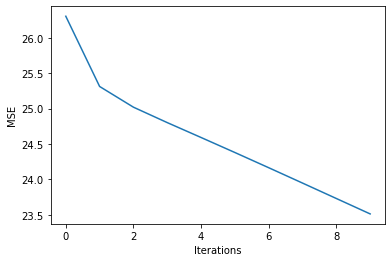

In [115]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [116]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[0.80170359, 0.58631537, 0.6503845 , ..., 1.09395305, 0.31642326,
        1.53210585],
       [1.03301075, 0.66632657, 0.71195415, ..., 1.28087489, 0.46494573,
        1.76095685],
       [1.63791444, 1.03866882, 1.10362501, ..., 2.00516513, 0.74865795,
        2.74946314],
       ...,
       [0.98309298, 0.57226624, 0.59006593, ..., 1.12967279, 0.48218829,
        1.52793175],
       [1.34181458, 0.78034606, 0.80433632, ..., 1.54081911, 0.65860609,
        2.0837027 ],
       [1.13603168, 0.75740218, 0.81777923, ..., 1.44416305, 0.49550791,
        1.995458  ]])

In [117]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = df_jester.columns

In [118]:
comparison_data
# For each data point, the number on the left is the original value from the dataset, the number on the right is the prediction

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 0.8017035889110153)","(8.79, 0.5863153709564459)","(-9.66, 0.6503845041625823)","(-8.16, -0.6889758928752424)","(-7.52, 0.6148205651116279)","(-8.5, 1.6166972243398363)","(-9.85, -0.20367920849545412)","(4.17, -0.3788074384714189)","(-8.98, -0.22793224704286993)","(-4.76, 1.2406810284414593)",...,"(2.82, 1.8401797969751588)","(nan, 1.254137160784917)","(99.0, 2.1955702794830887)","(nan, 1.2547923212539493)","(nan, 1.0183200403395523)","(nan, 1.607968009495881)","(99.0, 1.735891427538561)","(99.0, 1.0939530458102655)","(nan, 0.31642325738637234)","(99.0, 1.5321058502889815)"
1,"(4.08, 1.033010752938878)","(-0.29, 0.6663265716283207)","(6.36, 0.7119541496348504)","(4.37, -0.768914473732002)","(99.0, 0.7284098452345915)","(-9.66, 1.9134230643396029)","(-0.73, -0.11422574541546643)","(-5.34, -0.38884034183465893)","(8.88, -0.17456967852413635)","(9.22, 1.4313250371399655)",...,"(2.82, 2.141604655898075)","(-4.95, 1.502962755568555)","(-0.29, 2.586503947432485)","(7.86, 1.4277940200786412)","(-0.19, 1.2771162642417608)","(-2.14, 1.8217180021660797)","(3.06, 1.9505647149824423)","(0.34, 1.28087488795078)","(99.0, 0.46494572532504663)","(99.0, 1.760956850764164)"
2,"(nan, 1.637914439072383)","(nan, 1.0386688191298794)","(nan, 1.1036250121578892)","(nan, -1.195387552586001)","(9.03, 1.1421801403232772)","(99.0, 2.999908336329592)","(99.0, -0.15145213802865404)","(9.27, -0.5966711899122388)","(nan, -0.25295397495791994)","(nan, 2.2359880181318097)",...,"(nan, 3.349743983239228)","(nan, 2.360441101284515)","(nan, 4.0525573066180955)","(99.0, 2.2260440443306266)","(nan, 2.017955747687023)","(nan, 2.8384023219190158)","(nan, 3.035497005399122)","(nan, 2.005165129983992)","(nan, 0.7486579544782646)","(nan, 2.749463138002383)"
3,"(nan, 1.5651466680026425)","(8.35, 0.9565689330308575)","(nan, 1.0037468549955884)","(nan, -1.0943503327285193)","(1.8, 1.0657066535976967)","(8.16, 2.798182358188497)","(-2.82, -0.08494729244072004)","(6.21, -0.5301313628578558)","(nan, -0.1936729927372443)","(1.84, 2.0691712078534583)",...,"(nan, 3.1083666886163384)","(nan, 2.2099939301837144)","(nan, 3.774701786523785)","(0.53, 2.0509119437446035)","(99.0, 1.9141848063232332)","(nan, 2.6114033821041787)","(99.0, 2.7852290267974738)","(nan, 1.8641751100871493)","(99.0, 0.7384772219248621)","(nan, 2.541332956556554)"
4,"(8.5, 1.3277948585489)","(4.61, 0.7665840001923203)","(-4.17, 0.7880004634508095)","(-5.39, -0.8685095013278811)","(1.36, 0.871946675862626)","(1.6, 2.288321178399026)","(7.04, 0.002620783511946529)","(4.61, -0.3997215391927759)","(-0.44, -0.10427672244653119)","(5.73, 1.6710757760515424)",...,"(5.19, 2.5213440279083597)","(5.58, 1.8179037918276872)","(4.27, 3.080065727484572)","(5.19, 1.6446441930520395)","(5.73, 1.606261278233917)","(1.55, 2.0893253162547225)","(3.11, 2.2186580748074682)","(6.55, 1.5166230331672637)","(1.8, 0.6553250980281923)","(1.6, 2.0485191850066875)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,"(0.44, 1.3212961516149886)","(7.43, 0.7620277620629597)","(9.08, 0.7830062655357783)","(2.33, -0.8631865307888458)","(99.0, 0.8671034874261311)","(6.75, 2.275590130001316)","(-8.79, 0.003945134060721172)","(-0.53, -0.39686966571208054)","(-8.74, -0.10269164731174593)","(7.23, 1.6613874570996436)",...,"(8.83, 2.5069331673072655)","(-1.21, 1.8079867117295592)","(9.22, 3.062802744774227)","(-6.7, 1.63488934666154)","(8.45, 1.5980838173919707)","(9.03, 2.076842368561409)","(99.0, 2.2052174811948477)","(8.69, 1.5080390027548378)","(8.79, 0.6526339926166286)","(99.0, 2.0365696562096964)"
24979,"(9.13, 0.16557884202223494)","(-8.16, 0.09340147338974704)","(8.59, 0.09516373885947225)","(9.08, -0.10538136028156701)","(0.87, 0.10716413613138707)","(-8.93, 0.28118326387233117)","(-3.5, 0.003973062005736509)","(5.78, -0.04740427866277764)","(99.0, -0.010072994116912587)","(4.9, 0.20427064317487015)",...,"(-1.17, 0.3087710947090836

In [119]:
 df_jester.iloc[2745, 98]

1.99

Load the movies dataset

In [120]:
df_movies = pd.read_excel('https://github.com/albanda/CE888/blob/master/lab4-recommender/movies_latent_factors.xlsx?raw=true', sheet_name='Items')
df_movies.head(35)

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
5,24,Kill Bill: Vol. 1 (2003),-0.645019,1.997440,2.085625,-1.686559,-0.047874,-1.046274,1.613575,4.630243,0.276288,0.408997,-1.148072,0.269853,0.724543,-0.385681,1.036656
6,38,Eternal Sunshine of the Spotless Mind (2004),-0.695539,1.771799,0.143646,0.244718,0.434222,-0.367995,-0.186841,-0.961435,0.240228,-0.474231,0.492446,-1.041901,-0.181657,0.479142,0.237458
7,63,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),-0.615623,1.390542,0.759321,-0.408655,-0.099375,-0.073539,-0.261833,-0.923701,0.073849,-0.041067,0.782604,-0.539200,0.290092,-0.229462,0.432006
8,77,Memento (2000),-1.443730,1.466671,-0.121894,-0.237937,-0.301010,-0.650094,-0.000577,-1.122585,-0.201654,-0.662704,0.247859,-0.429991,-0.032267,0.513381,0.505265
9,85,Raiders of the Lost Ark (Indiana Jones and the...,-1.241724,0.021130,0.489161,0.424584,-1.262253,1.190654,-0.606434,0.305721,1.438862,0.402682,0.438831,0.784948,-0.874375,-0.399984,-0.197686


In [121]:
df_users = pd.read_excel('https://github.com/albanda/CE888/blob/master/lab4-recommender/movies_latent_factors.xlsx?raw=true', sheet_name='Users')
df_users

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
3,174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4,4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669
5,783,-0.020301,-0.031919,-0.036955,0.033690,0.000174,-0.003178,0.054474,0.045424,-0.053308,0.003437,-0.041750,0.059725,-0.021647,0.039873,-0.061857
6,3878,-0.091462,0.215879,-0.180453,0.085408,-0.321094,0.227947,0.053767,0.038017,0.097141,-0.139872,0.029253,0.214467,0.189250,0.065990,0.102776
7,768,0.000819,-0.009229,-0.019228,0.002703,0.012869,0.006655,0.007687,0.018747,0.014705,-0.009256,-0.010116,-0.010051,-0.002108,0.043223,-0.006670
8,4469,-0.030528,-0.011537,-0.042822,-0.014378,0.031338,0.012297,-0.000038,-0.010264,-0.006781,-0.019950,-0.014435,0.010926,0.024400,0.005318,-0.007983
9,1882,-0.083093,-0.029160,0.013748,0.022716,-0.062732,-0.080670,-0.019723,0.013253,-0.091305,-0.090687,0.030638,-0.113364,-0.021325,0.181508,0.022357


In [122]:
df_movies.describe()

,Movie ID,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,2574.960000,9.658940e-16,-5.706546e-16,2.468858e-16,-2.176037e-16,-4.102274e-16,8.038015e-16,-6.655787e-16,3.508305e-16,2.531308e-16,-6.350476e-16,2.592371e-16,5.588585e-16,5.495604e-16,-2.781109e-16,1.386391e-16
std,6557.621461,1.434126e+00,1.105639e+00,1.019001e+00,9.889839e-01,9.273277e-01,9.143293e-01,8.980056e-01,8.857253e-01,8.681050e-01,8.593479e-01,8.354311e-01,8.296074e-01,8.194622e-01,8.072468e-01,8.013211e-01
min,11.000000,-3.063639e+00,-2.526300e+00,-2.523378e+00,-2.255945e+00,-1.952736e+00,-2.237460e+00,-2.001102e+00,-1.686344e+00,-3.492897e+00,-2.986807e+00,-2.243340e+00,-2.568582e+00,-1.895101e+00,-2.381119e+00,-2.292566e+00
25%,192.250000,-9.085676e-01,-7.816401e-01,-6.895418e-01,-5.626113e-01,-5.604047e-01,-3.973040e-01,-4.986456e-01,-5.058015e-01,-3.345560e-01,-5.377058e-01,-5.447268e-01,-5.222680e-01,-5.925426e-01,-4.005383e-01,-4.391575e-01
50%,602.500000,-1.074541e-01,-5.696270e-02,-1.153739e-03,-1.223868e-01,-3.016506e-03,-1.264010e-01,-6.728086e-02,-7.593306e-02,6.907245e-02,2.081148e-01,-1.898273e-02,1.448565e-02,-6.951916e-03,-1.154223e-02,5.581660e-02
75%,1578.250000,1.050603e+00,8.827207e-01,4.743900e-01,3.573744e-01,5.400929e-01,3.181865e-01,3.884300e-01,3.530001e-01,3.455905e-01,5.575528e-01,4.191154e-01,4.632819e-01,6.310808e-01,4.554364e-01,4.736635e-01
max,36955.000000,4.023815e+00,2.186059e+00,2.310822e+00,2.579640e+00,2.750878e+00,2.805066e+00,3.524783e+00,4.630243e+00,1.816958e+00,1.546593e+00,3.070518e+00,2.550650e+00,2.193465e+00,2.215933e+00,2.120907e+00


In [123]:
#Question 

df_factor2 = df_movies[['Movie ID','Factor15']]
df_factor2.sort_values('Factor15')

,Movie ID,Factor15
4,22,-2.292566
27,238,-2.267831
86,4327,-2.247246
37,414,-1.959942
59,680,-1.833900
...,...,...
1,12,1.274993
61,752,1.460253
35,329,1.466918
90,8467,1.616338


In [124]:
# Q7
# In the movies dataset, what's the loading (i.e., value) of Factor15 for user with ID=4997?
num_factors = df_users.shape[1]-1
user_pref = df_users[df_users['User'] == 4997].iloc[:, -num_factors:].values[0]
item_feat = df_movies.iloc[:, -num_factors:].values

df_movies[df_movies['Movie ID']==597].index.values[0]

47

In [125]:
#Question 5

df_factor = df_movies[['Movie ID','Factor5']]

value = df_factor[df_factor['Movie ID']==10020]['Factor5'].values[0]
print(value)

round(value,3)

-0.04268691724914929


-0.043

In [126]:
#Question 7 and 8

num_factors = df_users.shape[1]-1
user_pref = df_users[df_users['User'] == 4997].iloc[:, -num_factors:].values[0]
item_feat = df_movies.iloc[:, -num_factors:].values

In [127]:
df_users[df_users['User']==4997]

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
10,4997,-0.185443,-0.276496,-0.781275,-0.240506,0.029611,-0.271814,-0.056266,-0.111825,-0.29091,-0.255087,-0.098079,0.103116,-0.100563,0.100164,0.043196


In [128]:
# Q7
df_users[df_users['User']==4997]

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
10,4997,-0.185443,-0.276496,-0.781275,-0.240506,0.029611,-0.271814,-0.056266,-0.111825,-0.29091,-0.255087,-0.098079,0.103116,-0.100563,0.100164,0.043196


In [129]:
# Q8
df_movies[['Movie ID','Factor4', 'Title']].sort_values('Factor4')

,Movie ID,Factor4,Title
51,604,-2.255945,The Matrix Reloaded (2003)
72,955,-1.732132,Mission: Impossible II (2000)
5,24,-1.686559,Kill Bill: Vol. 1 (2003)
71,954,-1.627068,Mission: Impossible (1996)
36,393,-1.624796,Kill Bill: Vol. 2 (2004)
...,...,...,...
65,808,2.286099,Shrek (2001)
1,12,2.443297,Finding Nemo (2003)
91,8587,2.532220,The Lion King (1994)
70,862,2.539259,Toy Story (1995)


In [130]:
a = df_users[df_users['User']==3519].iloc[:, 1:].values
a

array([[-0.06845373,  0.02009003,  0.03933617,  0.00295773, -0.01813993,
         0.0065014 , -0.10852635,  0.02504456,  0.05633395, -0.03129082,
        -0.03553257,  0.00517087,  0.0055464 ,  0.02077973, -0.02362267]])

In [131]:
#df_movies['Movie ID']==809]
b = df_movies[df_movies['Movie ID']==809].iloc[:, 2:].values
b

array([[ 1.17496416, -0.41038883,  0.23946776,  1.72750135, -0.6525887 ,
        -0.31607888,  0.6431075 ,  0.26101996, -2.32586209,  0.89387778,
         0.07965163,  0.70277496, -0.92768144, -0.10222999, -1.36816078]])

In [132]:
#Calculates the dot product between the User,movie and the factor. Change User/Movie/factor to compare two
np.array(df_users[df_users['User'] == 3519].iloc[:, 1:].values).dot(np.array(df_movies[df_movies['Movie ID']==809].iloc[:, 2:].values).reshape(-1,1))


array([[-0.26076162]])

In [160]:
# In the movies dataset, if you had to recommend 2 movies to the user with ID=3519, which ones would you choose?
a = np.array(df_users[df_users['User'] == 3519].iloc[:, 1:].values).dot(np.array(df_movies.iloc[:, 2:].values.T)) 

In [161]:
np.argsort(a)

array([[90, 85, 68, 51, 66, 65, 75, 63, 52,  4, 49, 76, 37, 81, 61, 93,
        46, 72, 24, 56,  1, 94, 89, 97, 95, 58, 86, 22, 99, 57, 54, 91,
        98, 70, 10, 67, 88, 74, 26, 39, 79, 43, 82, 96, 84, 42, 71, 23,
        83, 47, 40, 73, 92, 35, 13,  2, 15, 64, 45, 60, 12, 50, 41, 16,
        21, 55, 14, 80, 30, 18, 36,  7, 62, 69, 28, 29, 87, 19,  6, 34,
         8,  5, 33, 20, 44, 38, 17,  3, 53, 48, 31, 11, 27, 25, 32, 59,
         9, 78,  0, 77]])

In [155]:
a.shape

(1, 100)

In [158]:
np.sort(a)

array([[-0.58272507, -0.55949325, -0.26611419, -0.24252368, -0.23715157,
        -0.19019518, -0.18608846, -0.17626508, -0.17247235, -0.1467138 ,
        -0.12702437, -0.12614734, -0.11486044, -0.10834213, -0.0915853 ,
        -0.09139669, -0.08644739, -0.08579775, -0.0790791 , -0.07538908,
        -0.07171157, -0.06745937, -0.06616455, -0.06550805, -0.06393574,
        -0.06297777, -0.05853497, -0.05537039, -0.05304661, -0.04733122,
        -0.04399492, -0.04225351, -0.04044648, -0.03836876, -0.03828289,
        -0.03792838, -0.03766966, -0.03515081, -0.03241283, -0.0316595 ,
        -0.03144889, -0.03000292, -0.02902425, -0.0285552 , -0.02807627,
        -0.02171386, -0.01792311, -0.01702697, -0.01556672, -0.01176531,
        -0.0070945 , -0.00458117,  0.00259769,  0.00535663,  0.01394455,
         0.01660411,  0.01726592,  0.01728944,  0.021876  ,  0.02208653,
         0.0253917 ,  0.02698795,  0.03259425,  0.03480907,  0.03960945,
         0.04074267,  0.04670324,  0.04852418,  0.0

In [167]:
# In the movies dataset, if you had to recommend 2 movies to the user with ID=2067, which ones would you choose?
b = np.array(df_users[df_users['User'] == 2067].iloc[:, 1:].values).dot(np.array(df_movies.iloc[:, 2:].values.T))


In [168]:
np.argsort(b)

array([[58, 57, 14, 15, 16, 90, 85, 51, 86, 79, 68,  4, 37, 66, 72, 78,
        20, 19, 77,  0, 56, 98, 84, 83, 88, 28, 17, 75, 97, 62, 18, 93,
        52, 71,  7, 25, 65, 24, 50, 82, 99, 34, 23, 76,  9, 92, 43, 55,
         6, 63, 80, 32, 42, 29, 46, 35, 44, 12, 45, 94, 74, 22, 48, 81,
        95,  3, 36, 11, 87, 40, 53, 64,  8, 96, 69,  1, 59, 67, 89, 27,
        47, 54, 70, 30, 61, 38, 49,  5, 31, 41, 39, 13, 60, 73, 21, 26,
        91, 33, 10,  2]])

In [134]:
# In the movies dataset, if you had to recommend 2 movies to the user with ID=3519, which ones would you choose?
df_users[df_users['User']==3519]

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
15,3519,-0.068454,0.02009,0.039336,0.002958,-0.01814,0.006501,-0.108526,0.025045,0.056334,-0.031291,-0.035533,0.005171,0.005546,0.02078,-0.023623


In [135]:
#df_jester.sort_values(by=df_jester[0], ascending=True)

In [136]:
#df_jester[0].sort_values(ascending=True)

In [170]:
df_movies.head(15)

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
5,24,Kill Bill: Vol. 1 (2003),-0.645019,1.997440,2.085625,-1.686559,-0.047874,-1.046274,1.613575,4.630243,0.276288,0.408997,-1.148072,0.269853,0.724543,-0.385681,1.036656
6,38,Eternal Sunshine of the Spotless Mind (2004),-0.695539,1.771799,0.143646,0.244718,0.434222,-0.367995,-0.186841,-0.961435,0.240228,-0.474231,0.492446,-1.041901,-0.181657,0.479142,0.237458
7,63,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),-0.615623,1.390542,0.759321,-0.408655,-0.099375,-0.073539,-0.261833,-0.923701,0.073849,-0.041067,0.782604,-0.539200,0.290092,-0.229462,0.432006
8,77,Memento (2000),-1.443730,1.466671,-0.121894,-0.237937,-0.301010,-0.650094,-0.000577,-1.122585,-0.201654,-0.662704,0.247859,-0.429991,-0.032267,0.513381,0.505265
9,85,Raiders of the Lost Ark (Indiana Jones and the...,-1.241724,0.021130,0.489161,0.424584,-1.262253,1.190654,-0.606434,0.305721,1.438862,0.402682,0.438831,0.784948,-0.874375,-0.399984,-0.197686
